In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from warnings import filterwarnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 100

In [4]:
## to see first 10 rows and columns

In [5]:
df.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df.tail(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [7]:
df.shape

(50000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [9]:
### Here we are coverting the pickup into date and time

In [10]:
import datetime 

In [11]:
pd.to_datetime(df["date_time_of_pickup"])

0       2009-06-15 17:26:21+00:00
1       2010-01-05 16:52:16+00:00
2       2011-08-18 00:35:00+00:00
3       2012-04-21 04:30:42+00:00
4       2010-03-09 07:51:00+00:00
5       2011-01-06 09:50:45+00:00
6       2012-11-20 20:35:00+00:00
7       2012-01-04 17:22:00+00:00
8       2012-12-03 13:10:00+00:00
9       2009-09-02 01:11:00+00:00
10      2012-04-08 07:30:50+00:00
11      2012-12-24 11:24:00+00:00
12      2009-11-06 01:04:03+00:00
13      2013-07-02 19:54:00+00:00
14      2011-04-05 17:11:05+00:00
15      2013-11-23 12:57:00+00:00
16      2014-02-19 07:22:00+00:00
17      2009-07-22 16:08:00+00:00
18      2010-07-07 14:52:00+00:00
19      2014-12-06 20:36:22+00:00
20      2010-09-07 13:18:00+00:00
21      2013-02-12 12:15:46+00:00
22      2009-08-06 18:17:23+00:00
23      2010-12-06 12:29:00+00:00
24      2009-12-10 15:37:00+00:00
25      2011-06-21 16:15:00+00:00
26      2011-02-07 20:01:00+00:00
27      2011-06-28 19:47:00+00:00
28      2012-05-04 06:11:20+00:00
29      2013-0

In [12]:
### changing data time of pickup into hours
df["date_time_of_pickup"]=pd.to_datetime(df["date_time_of_pickup"])-datetime.timedelta(hours=4)

In [13]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [14]:
#  for spliting the data time of pick up into year ,month ,day,week day,hour

In [15]:
df["year"]=df.date_time_of_pickup.dt.year
df["month"]=df.date_time_of_pickup.dt.month
df["day"]=df.date_time_of_pickup.dt.day
df["weekday"]=df.date_time_of_pickup.dt.weekday
df["hour"]=df.date_time_of_pickup.dt.hour

In [16]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,weekday,hour
0,26:21.0,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,13
1,52:16.0,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,12
2,35:00.0,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,2,20
3,30:42.0,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,0
4,51:00.0,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,3


In [17]:
df.drop("date_time_of_pickup",axis=1,inplace=True) # here removing the "date_time_of_pickup" becoz it is not req ,already we are splitted.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
 7   year                  50000 non-null  int64  
 8   month                 50000 non-null  int64  
 9   day                   50000 non-null  int64  
 10  weekday               50000 non-null  int64  
 11  hour                  50000 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 4.6+ MB


In [19]:
### For calculating the Haversine Distance

In [20]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6367 * c
    return km

In [21]:
df["distance"]=haversine_np(df["longitude_of_pickup"],df["latitude_of_pickup"],df["longitude_of_dropoff"],df["latitude_of_dropoff"])

In [22]:
#here we are removing outliers for longitude and latitude also amount & count of passengers

In [23]:
df=df.loc[df['longitude_of_pickup'].between(-75,-72)]
df=df.loc[df['latitude_of_pickup'].between(40,42)]
df=df.loc[df['longitude_of_dropoff'].between(-75,-72)]
df=df.loc[df['latitude_of_dropoff'].between(40,42)]
df=df.loc[df["amount"]>2.5]
df=df.loc[df["no_of_passenger"]>0] 


In [24]:
### Visualization

<AxesSubplot:xlabel='amount', ylabel='Count'>

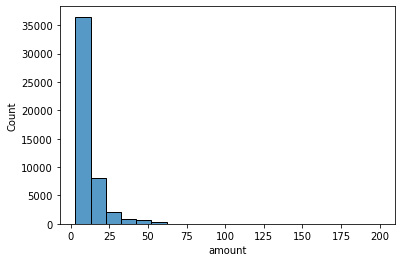

In [25]:
sns.histplot(df['amount'],kde=False,bins=20)

C:\Users\phili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday'>

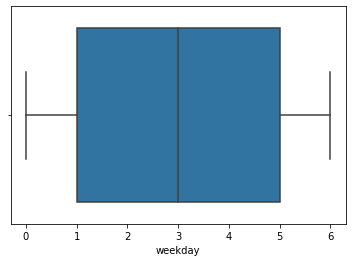

In [26]:
sns.boxplot(df['weekday'])

Text(0, 0.5, 'amount')

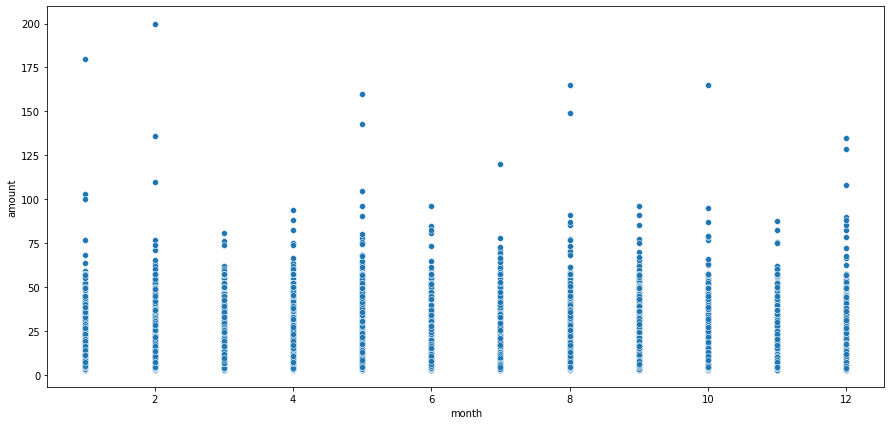

In [27]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = df["month"], y = df["amount"])
plt.xlabel('month')
plt.ylabel('amount')

<AxesSubplot:xlabel='year', ylabel='count'>

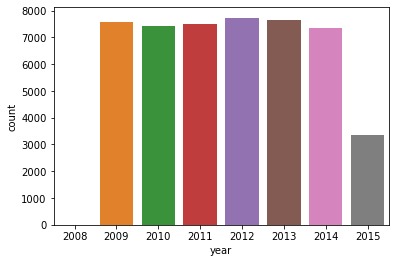

In [28]:
sns.countplot(x = df["year"])

<AxesSubplot:xlabel='no_of_passenger', ylabel='count'>

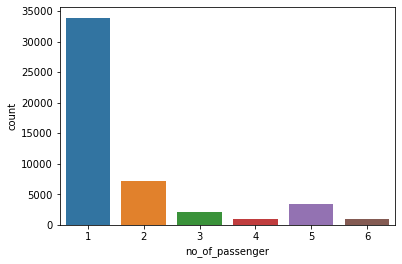

In [29]:
sns.countplot(x='no_of_passenger',data=df)

<AxesSubplot:xlabel='hour', ylabel='count'>

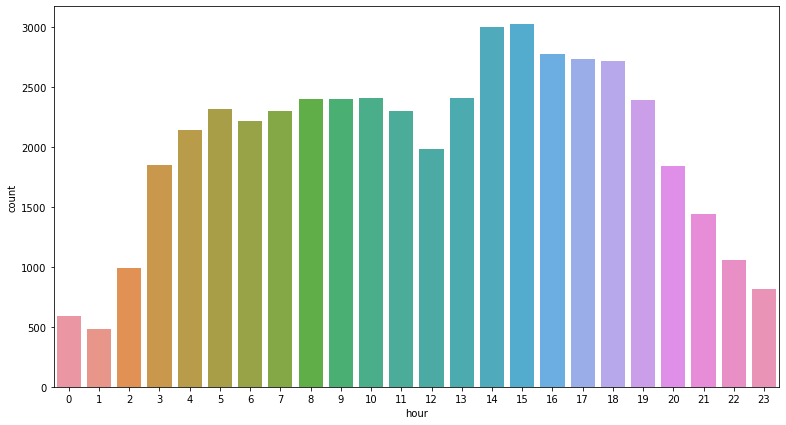

In [30]:
plt.figure(figsize=(13, 7))
sns.countplot(x = df["hour"])

Text(0, 0.5, 'amount')

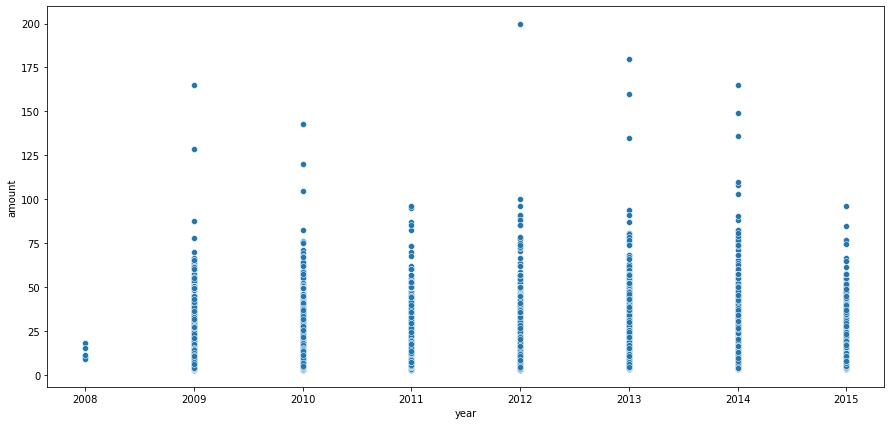

In [31]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = df["year"], y = df["amount"])
plt.xlabel('year')
plt.ylabel('amount')

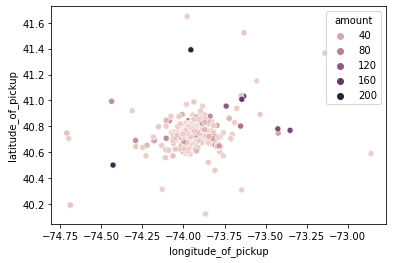

In [32]:
 ### Which pickup locations have the highest fares?
sns.scatterplot(x='longitude_of_pickup', y= 'latitude_of_pickup', hue='amount',data=df);

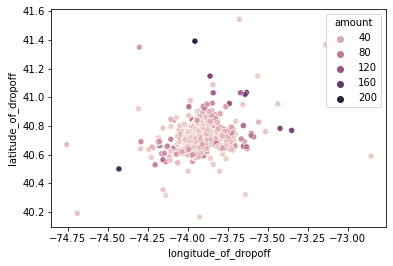

In [33]:
 ### Which drop locations have the highest fares?
sns.scatterplot(x="longitude_of_dropoff", y= 'latitude_of_dropoff',hue='amount',data=df);

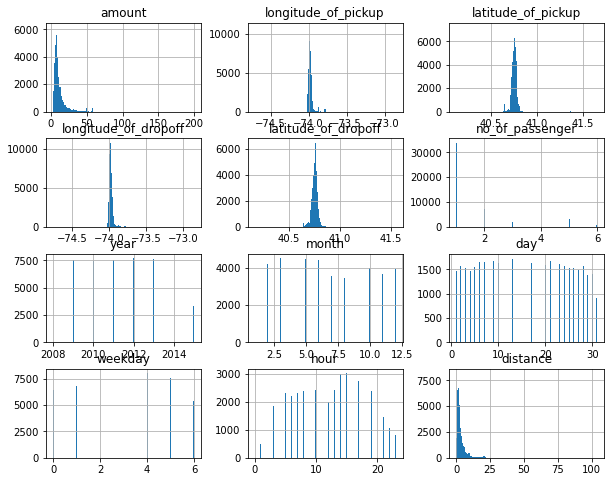

In [34]:
df.hist(figsize=(10,8), bins=200);

In [35]:
df.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,weekday,hour,distance
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,13,1.030117
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,12,8.444828
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,2,20,1.388653
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,0,2.797513
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,3,1.997902


In [36]:
df.drop(["unique_id"],axis=1,inplace=True) # removing unique id bcz its nt req

In [37]:
df.head(20)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,weekday,hour,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,13,1.030117
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,12,8.444828
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,2,20,1.388653
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,0,2.797513
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,3,1.997902
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,3,5,3.784861
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,20,1,16,1.554830
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,4,2,13,4.152835
8,9.0,-74.006462,40.726713,-73.993078,40.731628,1,2012,12,3,0,9,1.252445
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,1,1,21,2.847838


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48613 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                48613 non-null  float64
 1   longitude_of_pickup   48613 non-null  float64
 2   latitude_of_pickup    48613 non-null  float64
 3   longitude_of_dropoff  48613 non-null  float64
 4   latitude_of_dropoff   48613 non-null  float64
 5   no_of_passenger       48613 non-null  int64  
 6   year                  48613 non-null  int64  
 7   month                 48613 non-null  int64  
 8   day                   48613 non-null  int64  
 9   weekday               48613 non-null  int64  
 10  hour                  48613 non-null  int64  
 11  distance              48613 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 5.8 MB


In [39]:
### Linear Regressions

In [40]:
x=df.drop(['amount'],axis=1)
y=df[['amount']]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.21,test_size=0.1,random_state=1)

In [42]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
reg.score(x_train,y_train)

0.7453901345858333

In [44]:
reg.score(x_train,y_train)

0.7453901345858333

In [45]:
## KNeighborsRegressor

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [47]:
xscaled=x.apply(zscore) # convert all attributes
xscaled.describe()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,weekday,hour,distance
count,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04
mean,9.010732e-14,4.235711e-14,-4.492279e-13,3.271909e-14,1.819628e-15,5.175017e-14,-3.143649e-16,6.876403e-17,-3.110123e-16,1.555267e-17,-5.470383e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.870728e+01,-2.051308e+01,-2.033326e+01,-1.748657e+01,-5.242460e-01,-2.002956e+00,-1.525622e+00,-1.695608e+00,-1.557349e+00,-2.058595e+00,-8.617916e-01
25%,-4.337518e-01,-4.761068e-01,-4.489547e-01,-4.670444e-01,-5.242460e-01,-9.320765e-01,-9.478868e-01,-8.872830e-01,-1.035031e+00,-8.609095e-01,-5.366858e-01
50%,-1.750178e-01,7.533168e-02,-1.670108e-01,7.515947e-02,-5.242460e-01,1.388026e-01,-8.128326e-02,3.651692e-02,9.605505e-03,-5.420170e-03,-3.069579e-01
75%,1.730601e-01,5.426955e-01,2.259410e-01,5.031759e-01,2.511098e-01,6.742421e-01,7.853203e-01,8.448418e-01,1.054242e+00,8.500691e-01,1.489978e-01
max,2.840796e+01,2.929127e+01,2.912178e+01,2.359496e+01,3.352533e+00,1.745121e+00,1.651924e+00,1.768642e+00,1.576560e+00,1.876656e+00,2.577914e+01


In [48]:
x_train , x_test, y_train,y_test=train_test_split(x,y,train_size=0.24,test_size=0.1,random_state=2)

In [49]:
NNH =KNeighborsRegressor(n_neighbors=14)
NNH.fit(x_train,y_train)


KNeighborsRegressor(n_neighbors=14)

In [50]:
predicted_label=NNH.predict(x_test)
NNH.score(x_train,y_train)

0.7812555662873613

In [51]:
NNH.score(x_test,y_test)

0.7800404102958041

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
a = DecisionTreeRegressor(max_depth=6)

In [54]:
a.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [55]:
a.score(x_train,y_train)

0.8484840164303197

In [56]:
a.score(x_test,y_test)

0.8324250417710711

In [57]:
from sklearn.ensemble import BaggingRegressor

In [204]:
b = BaggingRegressor(n_estimators=16,base_estimator=a)

In [205]:
b.fit(x_train,y_train)

C:\Users\phili\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),
                 n_estimators=16)

In [206]:
b.score(x_train,y_train)

0.8666229946573756

In [207]:
b.score(x_test,y_test)

0.8571299736531528

In [208]:
from sklearn.ensemble import AdaBoostRegressor

In [221]:
c = AdaBoostRegressor(n_estimators=4)

In [222]:
c.fit(x_train,y_train)

C:\Users\phili\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(n_estimators=4)

In [223]:
c.score(x_train,y_train)

0.7774595609144911

In [224]:
c.score(x_test,y_test)

0.7941261351848596

In [233]:
from sklearn.ensemble import GradientBoostingRegressor

In [278]:
d = GradientBoostingRegressor(n_estimators=100)

In [279]:
d.fit(x_train,y_train)

C:\Users\phili\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor()

In [280]:
d.score(x_train,y_train)

0.887300562444229

In [281]:
d.score(x_test,y_test)

0.8687165002037064